# 광고 반응률 예측 (Logistic Regression)

로지스틱 회귀 (Logistic Regression): 이진분류 (2가지 값)를 예측하는 머신러닝 알고리즘

Logistic Regression의 원리
- 목표 : 주어진 입력 변수들을 기반으로 이진 분류 문제에서 각 클래스에 속할 확률을 예측
- 방법 : 선형 회귀 결과값을 0과 1 사이의 확률로 변환하기 위해 로지스틱 함수(시그모이드 함수)를 사용

Binary Classification
- 머신러닝 알고리즘x 
- Linear/Logistic Regression과 같은 머신러닝 알고리즘을 이용해서 풀어야할 문제 유형 중 하나
- 0과 1로 나타내며, 예측치는 %로 표현 가능

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [11]:
## 한글 폰트 설정
import os
os.name

import os
if os.name == 'posix' :
    plt.rc('font', family='AppleGothic')    # 맥
else:
    plt.rc('font', family='Malgun Gothic')  # 윈도우

# 마이너스 폰트 깨지는 문제애 대한 대처
plt.rc('axes', unicode_minus=False)

# 레티나 설정을 해주면 글씨가 더 선명해짐
%config InlineBackend.figure_font = 'retina'

In [12]:
# 데이터 불러오기
df = pd.read_csv("advertising.csv")

print(df.shape)
df.head(3)

(1000, 10)


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,NaN,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,3/27/2016 0:53,0
1,80.23,31.0,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,4/4/2016 1:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,3/13/2016 20:35,0


In [13]:
# 변수 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       916 non-null    float64
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.3+ KB


In [14]:
# 수치 데이터 확인
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,916.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.128821,55000.000080,180.000100,0.481000,0.50000
std,15.853615,9.018548,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


<Axes: xlabel='Area Income', ylabel='Density'>

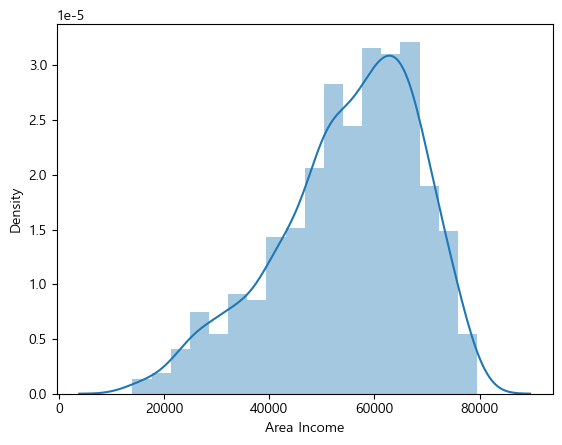

In [15]:
# 시각화
sns.distplot(df['Area Income'])

<Axes: xlabel='Age', ylabel='Density'>

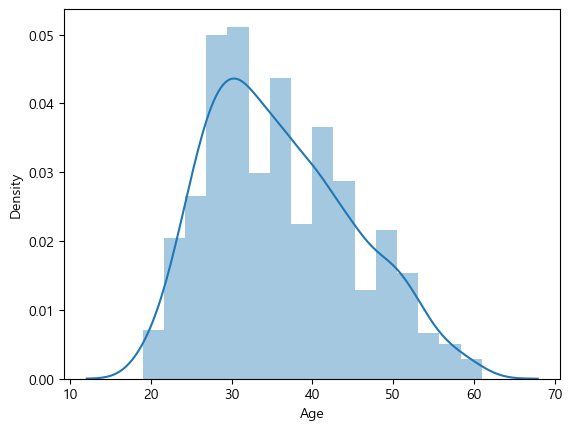

In [16]:
# 시각화
sns.distplot(df['Age'])

In [23]:
# object 타입 변수
print('unique한 Country 수 : ', df['Country'].nunique())
print('unique한 City 수 : ', df['City'].nunique())
print('unique한 Ad Topic Line 수 : ', df['Ad Topic Line'].nunique())

unique한 Country 수 :  237
unique한 City 수 :  969
unique한 Ad Topic Line 수 :  1000


불필요한 변수 버리기

In [26]:
df.isna().sum()

Daily Time Spent on Site     0
Age                         84
Area Income                  0
Daily Internet Usage         0
Ad Topic Line                0
City                         0
Male                         0
Country                      0
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [27]:
# 결측치 비율
df.isna().sum() / len(df)

Daily Time Spent on Site    0.000
Age                         0.084
Area Income                 0.000
Daily Internet Usage        0.000
Ad Topic Line               0.000
City                        0.000
Male                        0.000
Country                     0.000
Timestamp                   0.000
Clicked on Ad               0.000
dtype: float64

In [32]:
# 방법 1) null값이 있는 행 제거 (행 변화o 열 변화x)
# df.dropna(inplace=True)

# 방법 2) null 값이 있는 칼럼 제거 (행 변화x 열 변화o)
df.drop('Age', axis=1).shape

(1000, 9)

In [35]:
df['Age'].mean()

36.12882096069869

In [37]:
# 방법 3) 평균으로 결측치 대체 
df.fillna(round(df['Age'].mean(), 0), inplace=True)

# 확인
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

Train & Test set 분리

In [41]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [42]:
from sklearn.model_selection import train_test_split

X = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

X_train, X_test, y_train, y_test = train_test_split(X
                                                    , y
                                                    , test_size=0.2
                                                    , random_state=100)

In [45]:
# 확인
print('X_train의 shape : ', X_train.shape)
print('y_train의 shape : ', y_train.shape)
print('X_test의 shape : ', X_test.shape)
print('y_test의 shape : ', y_test.shape)

X_train의 shape :  (800, 5)
y_train의 shape :  (800,)
X_test의 shape :  (200, 5)
y_test의 shape :  (200,)


모델 학습

In [46]:
## Logistic Regression 모델 만들기

# sklearn 패키지에서는 summary 지원x
# statsmodels은 상수값이 없는 모델을 만드는게 기본 > 상수값을 넣으려면 별도의 function 필요
# sklearn은 기본적으로 y절편이 포함된 regression model 생성
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# 모델 학습
model.fit(X_train, y_train)

LogisticRegression()

In [47]:
# coef
model.coef_

array([[-9.43368197e-02,  2.66617613e-01, -6.62042519e-05,
        -1.35640076e-02,  5.11550063e-01]])

In [48]:
# 예측 및 평가
pred_y = model.predict(X_test)
pred_y

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1], dtype=int64)

In [49]:
# y_test와 pred_y 확인
pd.DataFrame({'y_test': y_test, 'pred_y': pred_y})

,y_test,pred_y
249,1,0
353,0,1
537,0,0
424,1,1
564,1,1
...,...,...
684,1,1
644,0,1
110,1,1
28,1,1


In [60]:
# 예측률
from sklearn.metrics import accuracy_score, confusion_matrix

print('예측률 : %s' % accuracy_score(y_test, pred_y))

예측률 : 0.91


In [61]:
## Confusion Matrix
print('<<Confusion Matrix>> \n', confusion_matrix(y_test, pred_y))

# 결과 해석
# 92, 90 (예측 성공) 8, 10 (예측 실패)
# 92 (실제 0인데 0이라고 예측) 90 (실제 1인데 1이라고 예측)
# 8 (실제 0인데 1이라고 예측) 10 (실제 1인데 0이라고 예측)

<<Confusion Matrix>> 
 [[92  8]
 [10 90]]


In [ ]:
''' 
Confusion Matrix
예측값 기준으로 positive, negative 분류

                  예측값
               0         1
         0   92(TN)    8(FP) 
 실제값
         1   10(FN)    90(TP)


FP : Type1 error 
FN : Type2 error 
'''